In [72]:
import pandas as pd

df = pd.read_csv('data/ModalShare.csv', engine='pyarrow').set_index(['region', 'Country', 'City'])
print(df.shape)
df.loc[:, ['CityID']].groupby(level=[1, 2]).count().sort_values('CityID', ascending=False)


(1092, 22)


CityID
Country   City                                  
Austria   Graz                                 8
Argentina Buenos Aires                         6
Austria   Vienna                               6
Germany   Erfurt                               5
          Dusseldorf                           5
...                                          ...
          Solingen                             1
          Spremberg                            1
          Strausberg                           1
          Teltow/Stahnsdorf/Kleinmachnow       1
Uruguay   Montevideo                           1

[856 rows x 1 columns]

In [60]:
df.reset_index().query('City == "Springfield"')

,region,Country,City,CityID,ObsID,year,LastObservation,metro_names,continent,subregion,...,Walking,Cycling,Motorbykes,Active,Bus,Car,IncomeGroup,DataSource,DataLink,GDPPP 2022
851,North America,United States,Springfield,M10676,C331,2019,YES,"Springfield, OH Metro Area",North America,Northern America,...,0.024283,0.001104,NaN,0.025386,0.002208,0.972406,High income,US CENSUS DATA - Commuting,https://censusreporter.org/,81695.18707
852,North America,United States,Springfield,M10677,C332,2019,YES,"Springfield, IL Metro Area",North America,Northern America,...,0.019274,0.003401,NaN,0.022676,0.010204,0.967120,High income,US CENSUS DATA - Commuting,https://censusreporter.org/,81695.18707
853,North America,United States,Springfield,M10678,C333,2019,YES,"Springfield, MO Metro Area",North America,Northern America,...,0.030578,0.001133,NaN,0.031710,0.003398,0.964892,High income,US CENSUS DATA - Commuting,https://censusreporter.org/,81695.18707
854,North America,United States,Springfield,M10679,C334,2019,YES,"Springfield, MA Metro Area",North America,Northern America,...,0.033533,0.005988,NaN,0.039521,0.025150,0.935329,High income,US CENSUS DATA - Commuting,https://censusreporter.org/,81695.18707


In [61]:
df['CityID'].drop_duplicates()

region                 Country         City     
Europe                 Germany         Aachen       M10001
                       Denmark         Aarhus       M10002
                       United Kingdom  Aberdeen     M10003
North America          United States   Abilene      M10004
Sub-Saharan Africa     Ghana           Accra        M10005
                                                     ...  
East Asia and Pacific  China           Zhuzhou      M10877
                                       Wenzhou      M10878
                                       Zhongshan    M10879
                                       Zibo         M10880
                                       Yantai       M10881
Name: CityID, Length: 877, dtype: object

In [62]:
df.reset_index().loc[:, ['Country', 'City', 'CityID']].drop_duplicates().groupby(['Country', 'City']).count().sort_values('CityID', ascending=False)

CityID
Country       City                
United States Springfield        4
              Albany             3
              Jackson            3
              Rochester          2
              Bloomington        2
...                            ...
Germany       Ludwigsfelde       1
              Magdeburg          1
              Mainz              1
              Mannheim           1
Uruguay       Montevideo         1

[856 rows x 1 columns]

In [63]:
df.reset_index().loc[:, ['City', 'Country', 'CityID']].value_counts()

City          Country        CityID
Graz          Austria        M10280    8
Buenos Aires  Argentina      M10119    6
Vienna        Austria        M10747    6
Dusseldorf    Germany        M10206    5
Erfurt        Germany        M10223    5
                                      ..
Hasselt       Belgium        M10310    1
Hattiesburg   United States  M10311    1
Hefei         China          M10825    1
Heidenau      Germany        M10313    1
Ålesund       Norway         M10017    1
Name: count, Length: 879, dtype: int64

In [64]:
g7_countries = [
    'United States', 'United Kingdom', 'France', 'Germany',
    'Canada', 'Italy', 'Japan'
]
df1 = df[df.index.get_level_values('Country').isin(g7_countries)].loc[:, ['Active', 'Bus', 'Car']]
df1

Active       Bus       Car
region        Country        City                                           
Europe        Germany        Aachen             0.340000  0.140000  0.520000
                             Aachen             0.405940  0.128710  0.465350
              United Kingdom Aberdeen           0.316830  0.178220  0.504950
North America United States  Abilene            0.009901  0.002200  0.987899
                             Aguadilla-Isabela  0.034079  0.001065  0.964856
...                                                  ...       ...       ...
                             Youngstown         0.023732  0.005394  0.970874
                             Yuba City          0.016026  0.003205  0.980769
                             Yuma               0.012035  0.017505  0.970460
Europe        Germany        Zwickau            0.280000  0.110000  0.610000
                             Regensburg         0.480000  0.110000  0.410000

[631 rows x 3 columns]

In [65]:
df1.groupby(level=[1]).mean()

,Active,Bus,Car
Country,,,
Canada,0.081678,0.153980,0.764342
France,0.297288,0.106188,0.596524
Germany,0.377613,0.156643,0.465744
Italy,0.245816,0.157314,0.596870
Japan,0.315000,0.560000,0.125000
United Kingdom,0.225335,0.212506,0.562158
United States,0.031399,0.010876,0.957731


In [66]:

df2 = df.loc[:, ['Active', 'Bus', 'Car']].groupby('Country').agg(['mean', 'median'])
pd.set_option('display.max_colwidth', None)
df2.columns = ['Active mean', 'Active median', 'Bus mean', 'Bus median', 'Car mean', 'Car median']
df2a = df2.loc[df2.index.isin( g7_countries), [x for x in df2.columns if 'mean' in x]]
df2a = df2a.sort_values('Car mean')
df2a

,Active mean,Bus mean,Car mean
Country,,,
Japan,0.315000,0.560000,0.125000
Germany,0.377613,0.156643,0.465744
United Kingdom,0.225335,0.212506,0.562158
France,0.297288,0.106188,0.596524
Italy,0.245816,0.157314,0.596870
Canada,0.081678,0.153980,0.764342
United States,0.031399,0.010876,0.957731


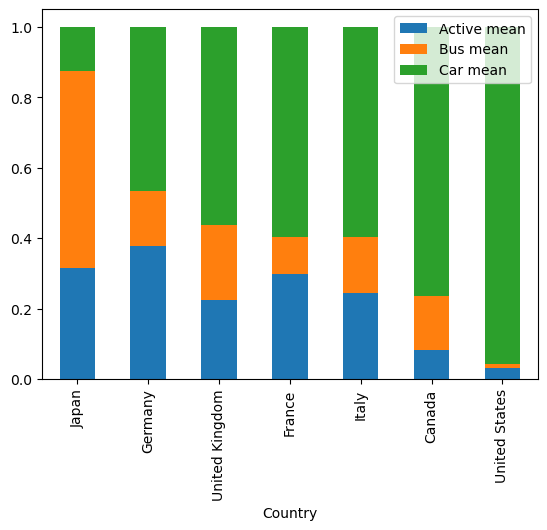

In [67]:
_ = df2a.plot(kind='bar', stacked=True)

In [68]:
df2b = df2.sort_values('Car median', ascending=False)
df2b.iloc[:10]

,Active mean,Active median,Bus mean,Bus median,Car mean,Car median
Country,,,,,,
United States,0.031399,0.025442,0.010876,0.006486,0.957731,0.966667
New Zealand,0.139783,0.101010,0.136277,0.121212,0.723941,0.818182
Australia,0.086549,0.059406,0.172051,0.140000,0.741400,0.810000
Canada,0.081678,0.070707,0.153980,0.140000,0.764342,0.787879
Ireland,0.205943,0.220000,0.115471,0.070000,0.678586,0.710000
South Africa,0.060000,0.065000,0.230000,0.260000,0.710000,0.685000
Norway,0.277962,0.280000,0.100437,0.080000,0.621601,0.650000
Portugal,0.197203,0.190960,0.198552,0.175000,0.604245,0.650000
Taiwan,0.134505,0.134505,0.249655,0.249655,0.615840,0.615840


In [69]:
df.columns

Index(['CityID', 'ObsID', 'year', 'LastObservation', 'metro_names',
       'continent', 'subregion', 'state_name', 'state_abbr', 'population',
       'longitude', 'latitude', 'Walking', 'Cycling', 'Motorbykes', 'Active',
       'Bus', 'Car', 'IncomeGroup', 'DataSource', 'DataLink', 'GDPPP 2022'],
      dtype='object')

In [70]:
df['Active'].corr(df['population']), df['Bus'].corr(df['population']), df['Car'].corr(df['population'])

(0.15928793531931898, 0.42894482291819175, -0.32652960226186173)

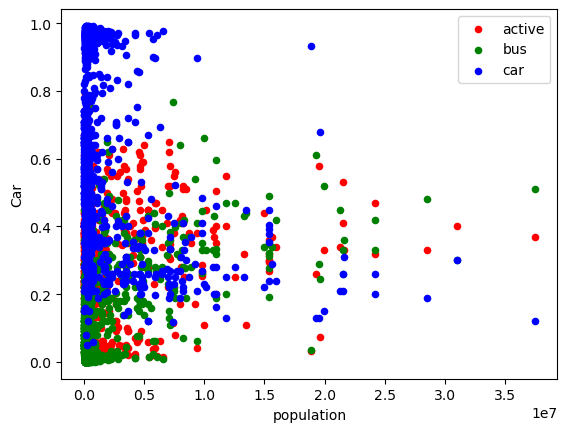

In [73]:
ax = df.plot(kind='scatter', x='population', y='Active', color = 'r', label='active')
df.plot(kind='scatter', x='population', y='Bus', color='g', ax=ax, label='bus')
_ = df.plot(kind='scatter', x='population', y='Car', color='b', ax=ax, label='car')

